In [37]:
from Classes import *
from funcoes import *

In [38]:
# Dimensões da seção retangular
b = 0.2  # em metros
h = 0.5  # em metros

In [39]:
# Posições extremas da seção transversal
yt = h / 2
yb = -h / 2

In [40]:
m = 10 #Número de elementos na diferença finita
L = 5 #Comprimento do pilar

In [41]:
# Definição do tipo de concreto
concreto = Concreto(20)

In [42]:
# Definição do tipo de aço
steel = Aco(50)  # CA50, colocar , 50 mas o aço aguenta 500 Mpa

# Posição das camadas de aço
dt = 0.025  # distância da armadura à borda da seção
yc = [h / 2 - dt, -h / 2 + dt]  # posição das camadas de aço
n_barras = np.array([3, 3])  # número de barras por camada

omega=0.4 #Adimensional da área de aço total na estrutura

Area_num = omega * b * h * concreto.sigma_cd / steel.fyd #Área de aço an estrutura em m²

Area = [(Area_num) / 2, (Area_num) / 2]

In [43]:
# Diagrama no espaço de deformações da seção
dig = Diagrama(concreto, yc, yt, yb, h)

# Cálculo da Verificação via Newton Raphson
nr = NewtonRaphson(10 ** -10, 1000, 10 ** -10, [0, 0],2)

In [44]:
# Adimensionais
nu = 0.3 #Adimensional do esforço solicitante normal
mi = 0.1 #Adimensional do momento fletor solicitante

# Verificação por diferenças finitas
M_0 = concreto.sigma_cd * b * h * h * mi
N_0 = concreto.sigma_cd * b * h * nu

In [45]:
f_inic = 0
tol_f = 10 ** -10
sol = Dif_fin_ver(nr, concreto, steel, yc, Area, b, h, yt, yb, m, f_inic, L, N_0, M_0, tol_f)

In [46]:
d=dig.diagrama_def(12000)
N=np.zeros(len(d))
M=np.zeros(len(d))
for i in range(0,len(d)):
    [N[i],M[i]]=vetor_esfor(concreto, b, h, yt, yb, steel, yc, Area, d[i,1], d[i,0])
[Nt,Mt,f]=Plot_Trajetoria_eq(nr, concreto, steel, yc, Area, b, h, yt, yb, m, f_inic, L, tol_f,1/3,0.001,0.6)

Não Existe Solução!
Secção inicial não aguentou as solicitações


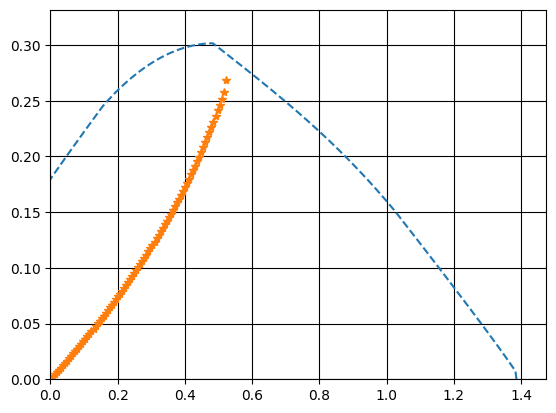

In [47]:
plt.plot(N[:]/(concreto.sigma_cd * b * h),M[:]/(concreto.sigma_cd * b * h * h ), '--')
plt.plot(Nt[:]/(concreto.sigma_cd * b * h),(Mt[:] + Nt[:]*f[:])/(concreto.sigma_cd * b * h * h ), '*')
plt.grid(color='black')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção 8 não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguentou as solicitações
Não Existe Solução!
Secção inicial não aguento

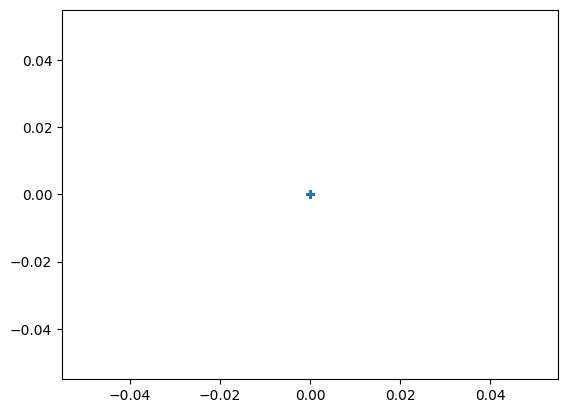

In [48]:
[Npt,Mpt,fpt]=Plot_Trajetoria_elui(nr, concreto, steel, yc, Area, b, h, yt, yb, m, f_inic, L, tol_f,0.01,1)
plt.plot(Npt[:]/(concreto.sigma_cd * b * h),(Mpt[:] + Npt[:]*fpt[:])/(concreto.sigma_cd * b * h * h ), '+')